In [1]:
import matplotlib.pylab as plt
plt.style.use("/afs/ihep.ac.cn/users/l/luoxj/Style/Paper.mplstyle")
%config InlineBackend.figure_format = 'svg'


import numpy as np
# f = np.load("./model_maxtime_combine_jobs_DSNB_sk_data/predict_0.npz", allow_pickle=True)
f = np.load("/afs/ihep.ac.cn/users/l/luoxj/sk_psd/model_maxtime_time_jobs_DSNB_sk_data/predict_0.npz", allow_pickle=True)
print(f"key: {f.files}")
predict_proba = f["predict_proba"][:,1]
equen = f["equen"]
vertex = f["vertex"]
labels = f["labels"]
pdgs = f["pdg_bkg"]



key: ['predict_proba', 'equen', 'vertex', 'labels', 'pdg_bkg', 'bkg_px', 'bkg_py', 'bkg_pz', 'bkg_x_init', 'bkg_y_init', 'bkg_z_init', 'bkg_x_nosmear', 'bkg_y_nosmear', 'bkg_z_nosmear']


In [2]:
dir_proba ={}
dir_proba["sig"] = predict_proba[labels==1]
dir_proba["bkg"] = predict_proba[labels==0]

In [3]:
x_init = f["bkg_x_init"]
y_init = f["bkg_x_init"]
z_init = f["bkg_y_init"]
x_nosmear = f["bkg_x_nosmear"]
y_nosmear = f["bkg_y_nosmear"]
z_nosmear = f["bkg_z_nosmear"]
px = f["bkg_px"]
py = f["bkg_py"]
pz = f["bkg_pz"]
p_square = (px**2 + py**2 +pz**2)



In [32]:
from collections import Counter
counter_pdg = Counter(np.concatenate(pdgs))
key_pdgs = [key for key in counter_pdg.keys()]

# Get mass of pdg in key_pdgs
from particle import Particle
mass_key_pdgs = np.array([ Particle.from_pdgid(pdg).mass if Particle.from_pdgid(pdg).mass!=None \
                           else 0 for pdg in key_pdgs])
# print("key_pdgs:\t", key_pdgs)
# print("mass:\t",  np.nan_to_num(mass_key_pdgs))
map_pdg2mass = {}
for i in range(len(key_pdgs)):
    map_pdg2mass[key_pdgs[i]] = mass_key_pdgs[i]
print("map of pdg to mass:\t",map_pdg2mass)




map of pdg to mass:	 {14: 0.0, 2112: 939.565413, 1000060110: 10257.0855621, 12: 0.0, 2212: 938.272081, 1000050100: 9326.991689, 22: 0.0, 1000040090: 8394.7944091, 1000020040: 3728.4012917, 1000030060: 5603.0509031, -14: 0.0, -12: 0.0, 1000030070: 6535.3662964, 1000010020: 1876.1239129, 1000040080: 7456.8944199, 1000020030: 2809.4134923, 1000040070: 6536.2281148, 1000050090: 8395.8625534, 1000060100: 9330.639513, 1000010030: 2809.4320829, 1000030080: 7472.8989882, 1000040100: 9327.5475115, 1000050110: 10255.1030632, 1000050080: 7474.8737557, 1000060090: 8412.3605248}


$T=\sqrt{m^2+p^2}-m$

In [52]:
from particle import Particle
v_E = []
v_E_nANDp = []

def GetKineticE(momentum_square:np.ndarray, mass:np.ndarray):
    return np.sqrt(momentum_square+mass**2)-mass

for i, pdg_1evt in enumerate(pdgs):
    index_nAndp = (pdg_1evt==2112) | (pdg_1evt==2212)
    index_no_neutrino = (pdg_1evt!=12) | (pdg_1evt!=14) | (pdg_1evt!=-14) |(pdg_1evt!=-12)
    v_mass = np.array([map_pdg2mass[i_pdg] for i_pdg in pdg_1evt])
    v_E_nANDp.append( np.sum(GetKineticE(p_square[i][index_nAndp], v_mass[index_nAndp] ) ))
    v_E.append(np.sum(GetKineticE(p_square[i][index_no_neutrino], v_mass[index_no_neutrino])))


Text(0, 0.5, 'PSD Output(Signal Probability)')

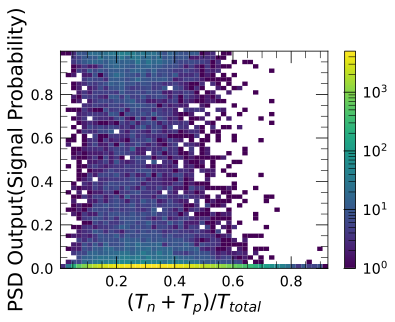

In [56]:
from matplotlib.colors import LogNorm
# print(len(v_E_nANDp))
# print(len(dir_proba["bkg"]))
v_E = np.array(v_E)
v_E_nANDp = np.array(v_E_nANDp)
plt.hist2d(np.sqrt(v_E_nANDp)/np.sqrt(v_E), dir_proba["bkg"], bins=50, norm=LogNorm())
plt.colorbar()
plt.xlabel("$(T_n+T_p)/T_{total}$")
plt.ylabel("PSD Output(Signal Probability)")

In [12]:
from particle import Particle
p = Particle.from_pdgid(2112)
p.mass

939.565413